In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_rf = pd.read_csv("df_linalol_tfidf.csv")

In [3]:
df_rf.columns.to_list()

['index',
 'tfidf_0',
 'tfidf_1',
 'tfidf_2',
 'tfidf_3',
 'tfidf_4',
 'tfidf_5',
 'tfidf_6',
 'tfidf_7',
 'tfidf_8',
 'tfidf_9',
 'tfidf_10',
 'tfidf_11',
 'tfidf_12',
 'tfidf_13',
 'tfidf_14',
 'tfidf_15',
 'tfidf_16',
 'tfidf_17',
 'tfidf_18',
 'tfidf_19',
 'tfidf_20',
 'tfidf_21',
 'tfidf_22',
 'tfidf_23',
 'tfidf_24',
 'tfidf_25',
 'tfidf_26',
 'tfidf_27',
 'tfidf_28',
 'tfidf_29',
 'tfidf_30',
 'tfidf_31',
 'tfidf_32',
 'tfidf_33',
 'tfidf_34',
 'tfidf_35',
 'tfidf_36',
 'tfidf_37',
 'tfidf_38',
 'tfidf_39',
 'tfidf_40',
 'tfidf_41',
 'tfidf_42',
 'tfidf_43',
 'tfidf_44',
 'tfidf_45',
 'tfidf_46',
 'tfidf_47',
 'tfidf_48',
 'tfidf_49',
 'tfidf_50',
 'tfidf_51',
 'tfidf_52',
 'tfidf_53',
 'tfidf_54',
 'tfidf_55',
 'tfidf_56',
 'tfidf_57',
 'tfidf_58',
 'tfidf_59',
 'tfidf_60',
 'tfidf_61',
 'tfidf_62',
 'tfidf_63',
 'tfidf_64',
 'tfidf_65',
 'tfidf_66',
 'tfidf_67',
 'tfidf_68',
 'tfidf_69',
 'tfidf_70',
 'tfidf_71',
 'tfidf_72',
 'tfidf_73',
 'tfidf_74',
 'tfidf_75',
 'tfidf_76',

Splitting dependent and independent variables

In [4]:
X = df_rf.drop(['index', 'X..Linalool'], axis = 1)
y = df_rf[['X..Linalool']]

Plotting histograms on target variable

In [6]:
y_array = y.to_numpy()
y_array

array([[0.5   ],
       [0.5   ],
       [0.5   ],
       ...,
       [0.0625],
       [0.0625],
       [0.0625]])

<AxesSubplot:ylabel='Count'>

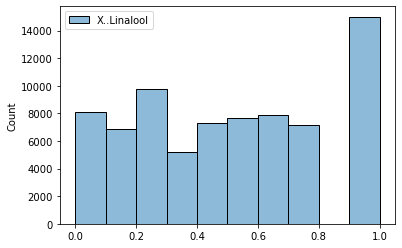

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

RF modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
rfreg = RandomForestRegressor()
rfreg.fit(X_train1, y_train1)

/var/folders/y1/pjvjlkjn5gl846rnyzr53p340000gn/T/ipykernel_11392/350139188.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


RandomForestRegressor()

In [11]:
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

In [12]:
mean_absolute_error(y_val, y_pred_rfreg)

0.03783331697686353

In [13]:
mean_squared_error(y_val, y_pred_rfreg)

0.0068319635696874196

In [14]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.08265569290549453

In [15]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9819094879986113

In [16]:
#val
r2_score(y_val, y_pred_rfreg)

0.9314732644890071

Residual plots for each target variable

Feature Selection

In [17]:
df_feat = pd.DataFrame({
    "features": X_train1.columns,
    "score": rfreg.feature_importances_
})

In [18]:
df_feat

,features,score
0,tfidf_0,0.004829
1,tfidf_1,0.000898
2,tfidf_2,0.000171
3,tfidf_3,0.000239
4,tfidf_4,0.000489
...,...,...
464,tree,0.000098
465,tropical,0.000274
466,vanilla,0.001207
467,violet,0.000020


In [19]:
df_feat_ranked = df_feat.sort_values("score", ascending=False)

In [20]:
pd.set_option('display.max_rows', df_feat_ranked.shape[0]+1)
df_feat_ranked

,features,score
388,hybrid,2.317947e-01
265,tfidf_265,2.948499e-02
329,tfidf_329,2.757780e-02
451,pine,2.534950e-02
428,cheese,2.383988e-02
168,tfidf_168,1.593202e-02
447,orange,1.480374e-02
145,tfidf_145,1.429457e-02
312,tfidf_312,1.368945e-02
78,tfidf_78,1.346955e-02


In [20]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [21]:
selector.estimator_.feature_importances_

array([4.76699946e-03, 1.06090383e-03, 1.71271944e-04, 4.36178623e-04,
       5.33474132e-04, 7.97860303e-03, 1.29609285e-03, 3.30401004e-03,
       4.79452554e-04, 4.67481066e-04, 1.71078142e-04, 1.96874625e-03,
       1.03204671e-04, 3.19854227e-04, 3.96335922e-04, 3.04831478e-03,
       4.38208210e-04, 6.66538045e-04, 6.64990268e-05, 3.61341829e-04,
       4.88802760e-03, 6.60876368e-04, 6.15951761e-04, 3.17790961e-04,
       1.03267726e-03, 1.43162478e-04, 9.48985072e-04, 1.47264787e-03,
       2.57595325e-04, 2.33111966e-03, 2.80711745e-03, 4.05114839e-04,
       9.36011084e-04, 1.00268159e-04, 1.19556742e-03, 1.05421828e-04,
       6.95777759e-04, 2.24349634e-03, 1.19440157e-04, 9.80268173e-04,
       1.95565808e-04, 6.75311303e-04, 1.61469984e-03, 4.04161723e-03,
       2.13623904e-04, 1.99173516e-03, 1.06957269e-03, 1.59608086e-04,
       7.52303917e-04, 6.81391915e-04, 1.09558741e-04, 3.87382275e-04,
       2.26678685e-04, 4.16850070e-04, 1.04447511e-03, 8.82613261e-04,
      

In [22]:
selector.threshold_

0.0021321961620469083

In [23]:
mask = selector.get_support()

In [24]:
mask

array([ True, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False,

In [25]:
selected_features = X.columns[mask]

In [26]:
selected_X = df_rf[selected_features]
selected_X

,tfidf_0,tfidf_5,tfidf_7,tfidf_15,tfidf_20,tfidf_29,tfidf_30,tfidf_37,tfidf_43,tfidf_70,...,cheese,diesel,earthy,honey,lemon,orange,pine,pineapple,pungent,sweet
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.14162,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.14162,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.0,0.322452,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
74996,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
74997,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
74998,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


Train test split (after Feature Selection)

In [27]:
import joblib

joblib.dump(selector, "selector_rf_tfidf_linalol.pkl")
joblib.dump(selected_X, "selected_X_rf_tfidf_linalol.pkl")

['selected_X_rf_tfidf_linalol.pkl']

In [21]:
import joblib

selected_X = joblib.load("selected_X_rf_tfidf_linalol.pkl")

In [22]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [23]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [24]:
rfreg.fit(X_train1, y_train1)
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

/var/folders/y1/pjvjlkjn5gl846rnyzr53p340000gn/T/ipykernel_11392/3758305.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


In [25]:
mean_absolute_error(y_val, y_pred_rfreg)

0.03856700365281105

In [26]:
mean_squared_error(y_val, y_pred_rfreg)

0.006879632749237326

In [27]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.08294355158321427

In [28]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9755168731523437

In [29]:
#val
r2_score(y_val, y_pred_rfreg)

0.9312689438446768

Hyperparameter Tuning

In [30]:
parameters = {'max_depth': [None, 10, 50, 100],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 300, 500]}

In [31]:
rscv = RandomizedSearchCV(rfreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs = -1)

In [32]:
rscv.fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andalanp

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='neg_mean_absolute_error')

In [33]:
rscv.best_params_

{'n_estimators': 300,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None}

In [34]:
joblib.dump(rscv, "rscv_rf_tfidf_linalol.pkl")
joblib.dump(rscv.best_params_, "rscv_rf_tfidf_best_params_linalol.pkl")

['rscv_rf_tfidf_best_params_linalol.pkl']

RF (after Hyperparameter Tuning)

In [35]:
rfreg_ht = RandomForestRegressor(n_estimators = 300, min_samples_split = 10, min_samples_leaf = 2, max_features = 'auto', max_depth = None)
rfreg_ht.fit(X_train1, y_train1)
y_pred_rfreg = rfreg_ht.predict(X_val)
y_pred_rfreg_r2 = rfreg_ht.predict(X_train1)

/var/folders/y1/pjvjlkjn5gl846rnyzr53p340000gn/T/ipykernel_11392/4262949887.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg_ht.fit(X_train1, y_train1)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [36]:
mean_absolute_error(y_val, y_pred_rfreg)

0.04937701613735408

In [37]:
mean_squared_error(y_val, y_pred_rfreg)

0.00824334602459783

In [38]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.0907928743051889

In [39]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9595071048058225

In [40]:
#val
r2_score(y_val, y_pred_rfreg)

0.917644749483582

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [41]:
y_pred_rfreg_test = rfreg_ht.predict(X_test)

In [42]:
joblib.dump(y_pred_rfreg_test, "y_pred_rfreg_test_tfidf_linalol.pkl")
joblib.dump(y_test, "y_test_rfreg_tfidf_linalol.pkl")

['y_test_rfreg_tfidf_linalol.pkl']

In [43]:
mean_absolute_error(y_test, y_pred_rfreg_test)

0.048609766789712884

In [44]:
mean_squared_error(y_test, y_pred_rfreg_test)

0.008304475437463366

In [45]:
mean_squared_error(y_test, y_pred_rfreg_test, squared = False)

0.09112889463536451

In [46]:
r2_score(y_test, y_pred_rfreg_test)

0.9174493353568425

Error analysis

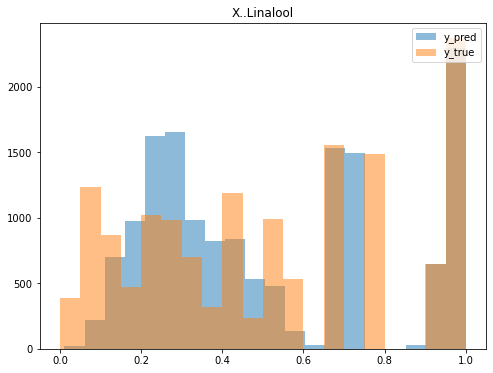

<Figure size 432x288 with 0 Axes>

In [47]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Linalool"  # specify the target variable name
ax.hist(y_pred_rfreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_tfidf_linalol.png')

Pearson R

In [48]:
corr_coef, p_value = pearsonr(y_pred_rfreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.959
P-value: 0.000


<AxesSubplot:>

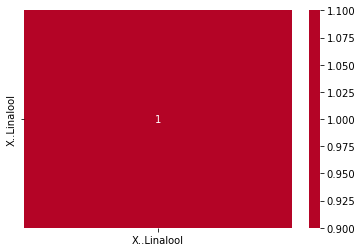

In [49]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)